<a href="https://colab.research.google.com/github/baothai20146117/AI/blob/main/w2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install Scikit-Fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz


x = np.arange(11)
#membership function
mfx =  fuzz.trimf(x,[0,5,10])
x 
mfx





array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,80,0.1)

#trimf : triangle membership function :  vẽ hình tam giác
#trapmf(x,[30,30,50,60]) : trapezoid membership function :  vẽ hình thang
#gaussmf(x,a,c) : gauss membership function :  vẽ biểu đồ gauss

#slow = fuzz.trapmf(x,[30,30,50,60])
#medium = fuzz.trapmf(x,[30,50,70,80])
#medium_fast = fuzz.trapmf(x,[30,50,60,80])
#full_speed = fuzz.trapmf(x,[40,60,80,80])



#slow = fuzz.gaussmf(x,30,10)
#medium = fuzz.gaussmf(x,50,3)
#medium_fast = fuzz.gaussmf(x,60,5)
#full_speed = fuzz.gaussmf(x,70,2)

slow = fuzz.gbellmf(x,60,7,4)
#b :  đọ rộng của đuognwf cong 
#c : độ dốc
#a : tâm 





plt.figure()

#plt.plot(x,full_speed,'b',linewidth=1.5,label='Full Speed')
#plt.plot(x,medium_fast,'k',linewidth=1.5,label='Medium Fast')
#plt.plot(x,medium,'g',linewidth=1.5,label='Medium')
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')







13.333333333333334


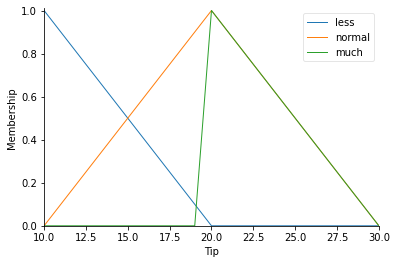

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1),'Food')
service = ctrl.Antecedent(np.arange(0,11,1),'Service')
tip = ctrl.Consequent(np.arange(10,31,1),'Tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,10,20])
tip['normal'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,20,30])

rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'] )
rule2 = ctrl.Rule(food['poor']&service['average'],tip['less'] )
rule3 = ctrl.Rule(food['poor']&service['good'],tip['normal'] )
rule4 = ctrl.Rule(food['average']&service['poor'],tip['less'] )
rule5 = ctrl.Rule(food['average']&service['average'],tip['normal'] )
rule6 = ctrl.Rule(food['average']&service['good'],tip['normal'] )
rule7 = ctrl.Rule(food['good']&service['poor'],tip['less'] )
rule8 = ctrl.Rule(food['good']&service['average'],tip['normal'] )
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'] )

tipping_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping= ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['Food'] = 0
tipping.input['Service'] = 0

tipping.compute()

print(tipping.output['Tip'])
tip.view(sum=tipping)
